# Universal Bank

**Table of contents**<a id='toc0_'></a>    
- 1. [Problem Definition](#toc1_)    
- 2. [Getting Started](#toc2_)    
  - 2.1. [Load Libraries](#toc2_1_)    
  - 2.2. [Load Dataset](#toc2_2_)    
- 3. [Exploratory Data Analysis](#toc3_)    
  - 3.1. [Descriptive Statistics](#toc3_1_)    
  - 3.2. [Data Visualisation](#toc3_2_)    
  - 3.3. [Time Series Analysis](#toc3_3_)    
- 4. [Data Preparation](#toc4_)    
  - 4.1. [Data Cleaning](#toc4_1_)    
  - 4.2. [Feature Selection](#toc4_2_)    
- 5. [Evaluate Algorithms and Models](#toc5_)    
  - 5.1. [Train/Test Split](#toc5_1_)    
  - 5.2. [Evaluation Metrics](#toc5_2_)    
  - 5.3. [Compare Models and Algorithms](#toc5_3_)    
    - 5.3.1. [Machine Learning models-scikit-learn](#toc5_3_1_)    
    - 5.3.2. [Time Series based Models-ARIMA and LSTM](#toc5_3_2_)    
- 6. [Model Tuning and Grid Search](#toc6_)    
- 7. [Finalise the model](#toc7_)    
  - 7.1. [Result on the test dataset](#toc7_1_)    
  - 7.2. [Save Model for Later Use](#toc7_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Problem Definition](#toc0_)

## 2. <a id='toc2_'></a>[Getting Started](#toc0_)

In [2]:
# Não exibir warnings
options(warn = -1)

# Limpar o ambiente
rm(list = ls())

### 2.1. <a id='toc2_1_'></a>[Load Libraries](#toc0_)

In [23]:

# install.packages("readxl")
# install.packages("DataExplorer")
# install.packages("gridExtra")
# install.packages("GGally")
# install.packages("caret")
# install.packages("MASS")
# install.packages("car")
# install.packages("rpart")
# install.packages("rattle")
# install.packages('rpart.plot')
# install.packages('RColorBrewer')
# install.packages("remotes")  #<- instalar 
# library(remotes)
# remotes::install_github("cran/DMwR", force = TRUE) #<- instalar
# install.packages("leaps")

# library(tidyverse)
library(conflicted)
library(gridExtra)
library(DMwR)
library(caret)
library(MASS)
library(car)
library(ggplot2)

### 2.2. <a id='toc2_2_'></a>[Load Dataset](#toc0_)

In [ ]:
df <- read.csv("UniversalBank.csv") |> 
  dplyr::select(ID, PersonalLoan, everything())

Y <- df$PersonalLoan
X <- df |> dplyr::select(-PersonalLoan)

,ID,PersonalLoan,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,25,1,49,91107,4,1.6,1,0,1,0,0,0
2,2,0,45,19,34,90089,3,1.5,1,0,1,0,0,0
3,3,0,39,15,11,94720,1,1.0,1,0,0,0,0,0
4,4,0,35,9,100,94112,1,2.7,2,0,0,0,0,0
5,5,0,35,8,45,91330,4,1.0,2,0,0,0,0,1
6,6,0,37,13,29,92121,4,0.4,2,155,0,0,1,0


## 3. <a id='toc3_'></a>[Exploratory Data Analysis](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Descriptive Statistics](#toc0_)

In [20]:
options(digits = 3)  # Define a precisão para 3 casas decimais
summary(dataset)     # Exibe um resumo estatístico do dataset

       ID        PersonalLoan        Age         Experience       Income     
 Min.   :   1   Min.   :0.000   Min.   :23.0   Min.   :-3.0   Min.   :  8.0  
 1st Qu.:1251   1st Qu.:0.000   1st Qu.:35.0   1st Qu.:10.0   1st Qu.: 39.0  
 Median :2500   Median :0.000   Median :45.0   Median :20.0   Median : 64.0  
 Mean   :2500   Mean   :0.096   Mean   :45.3   Mean   :20.1   Mean   : 73.8  
 3rd Qu.:3750   3rd Qu.:0.000   3rd Qu.:55.0   3rd Qu.:30.0   3rd Qu.: 98.0  
 Max.   :5000   Max.   :1.000   Max.   :67.0   Max.   :43.0   Max.   :224.0  
    ZIP.Code         Family        CCAvg         Education       Mortgage  
 Min.   : 9307   Min.   :1.0   Min.   : 0.00   Min.   :1.00   Min.   :  0  
 1st Qu.:91911   1st Qu.:1.0   1st Qu.: 0.70   1st Qu.:1.00   1st Qu.:  0  
 Median :93437   Median :2.0   Median : 1.50   Median :2.00   Median :  0  
 Mean   :93153   Mean   :2.4   Mean   : 1.94   Mean   :1.88   Mean   : 56  
 3rd Qu.:94608   3rd Qu.:3.0   3rd Qu.: 2.50   3rd Qu.:3.00   3rd Qu.:101 

In [21]:
head(dataset)

,ID,PersonalLoan,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,25,1,49,91107,4,1.6,1,0,1,0,0,0
2,2,0,45,19,34,90089,3,1.5,1,0,1,0,0,0
3,3,0,39,15,11,94720,1,1.0,1,0,0,0,0,0
4,4,0,35,9,100,94112,1,2.7,2,0,0,0,0,0
5,5,0,35,8,45,91330,4,1.0,2,0,0,0,0,1
6,6,0,37,13,29,92121,4,0.4,2,155,0,0,1,0


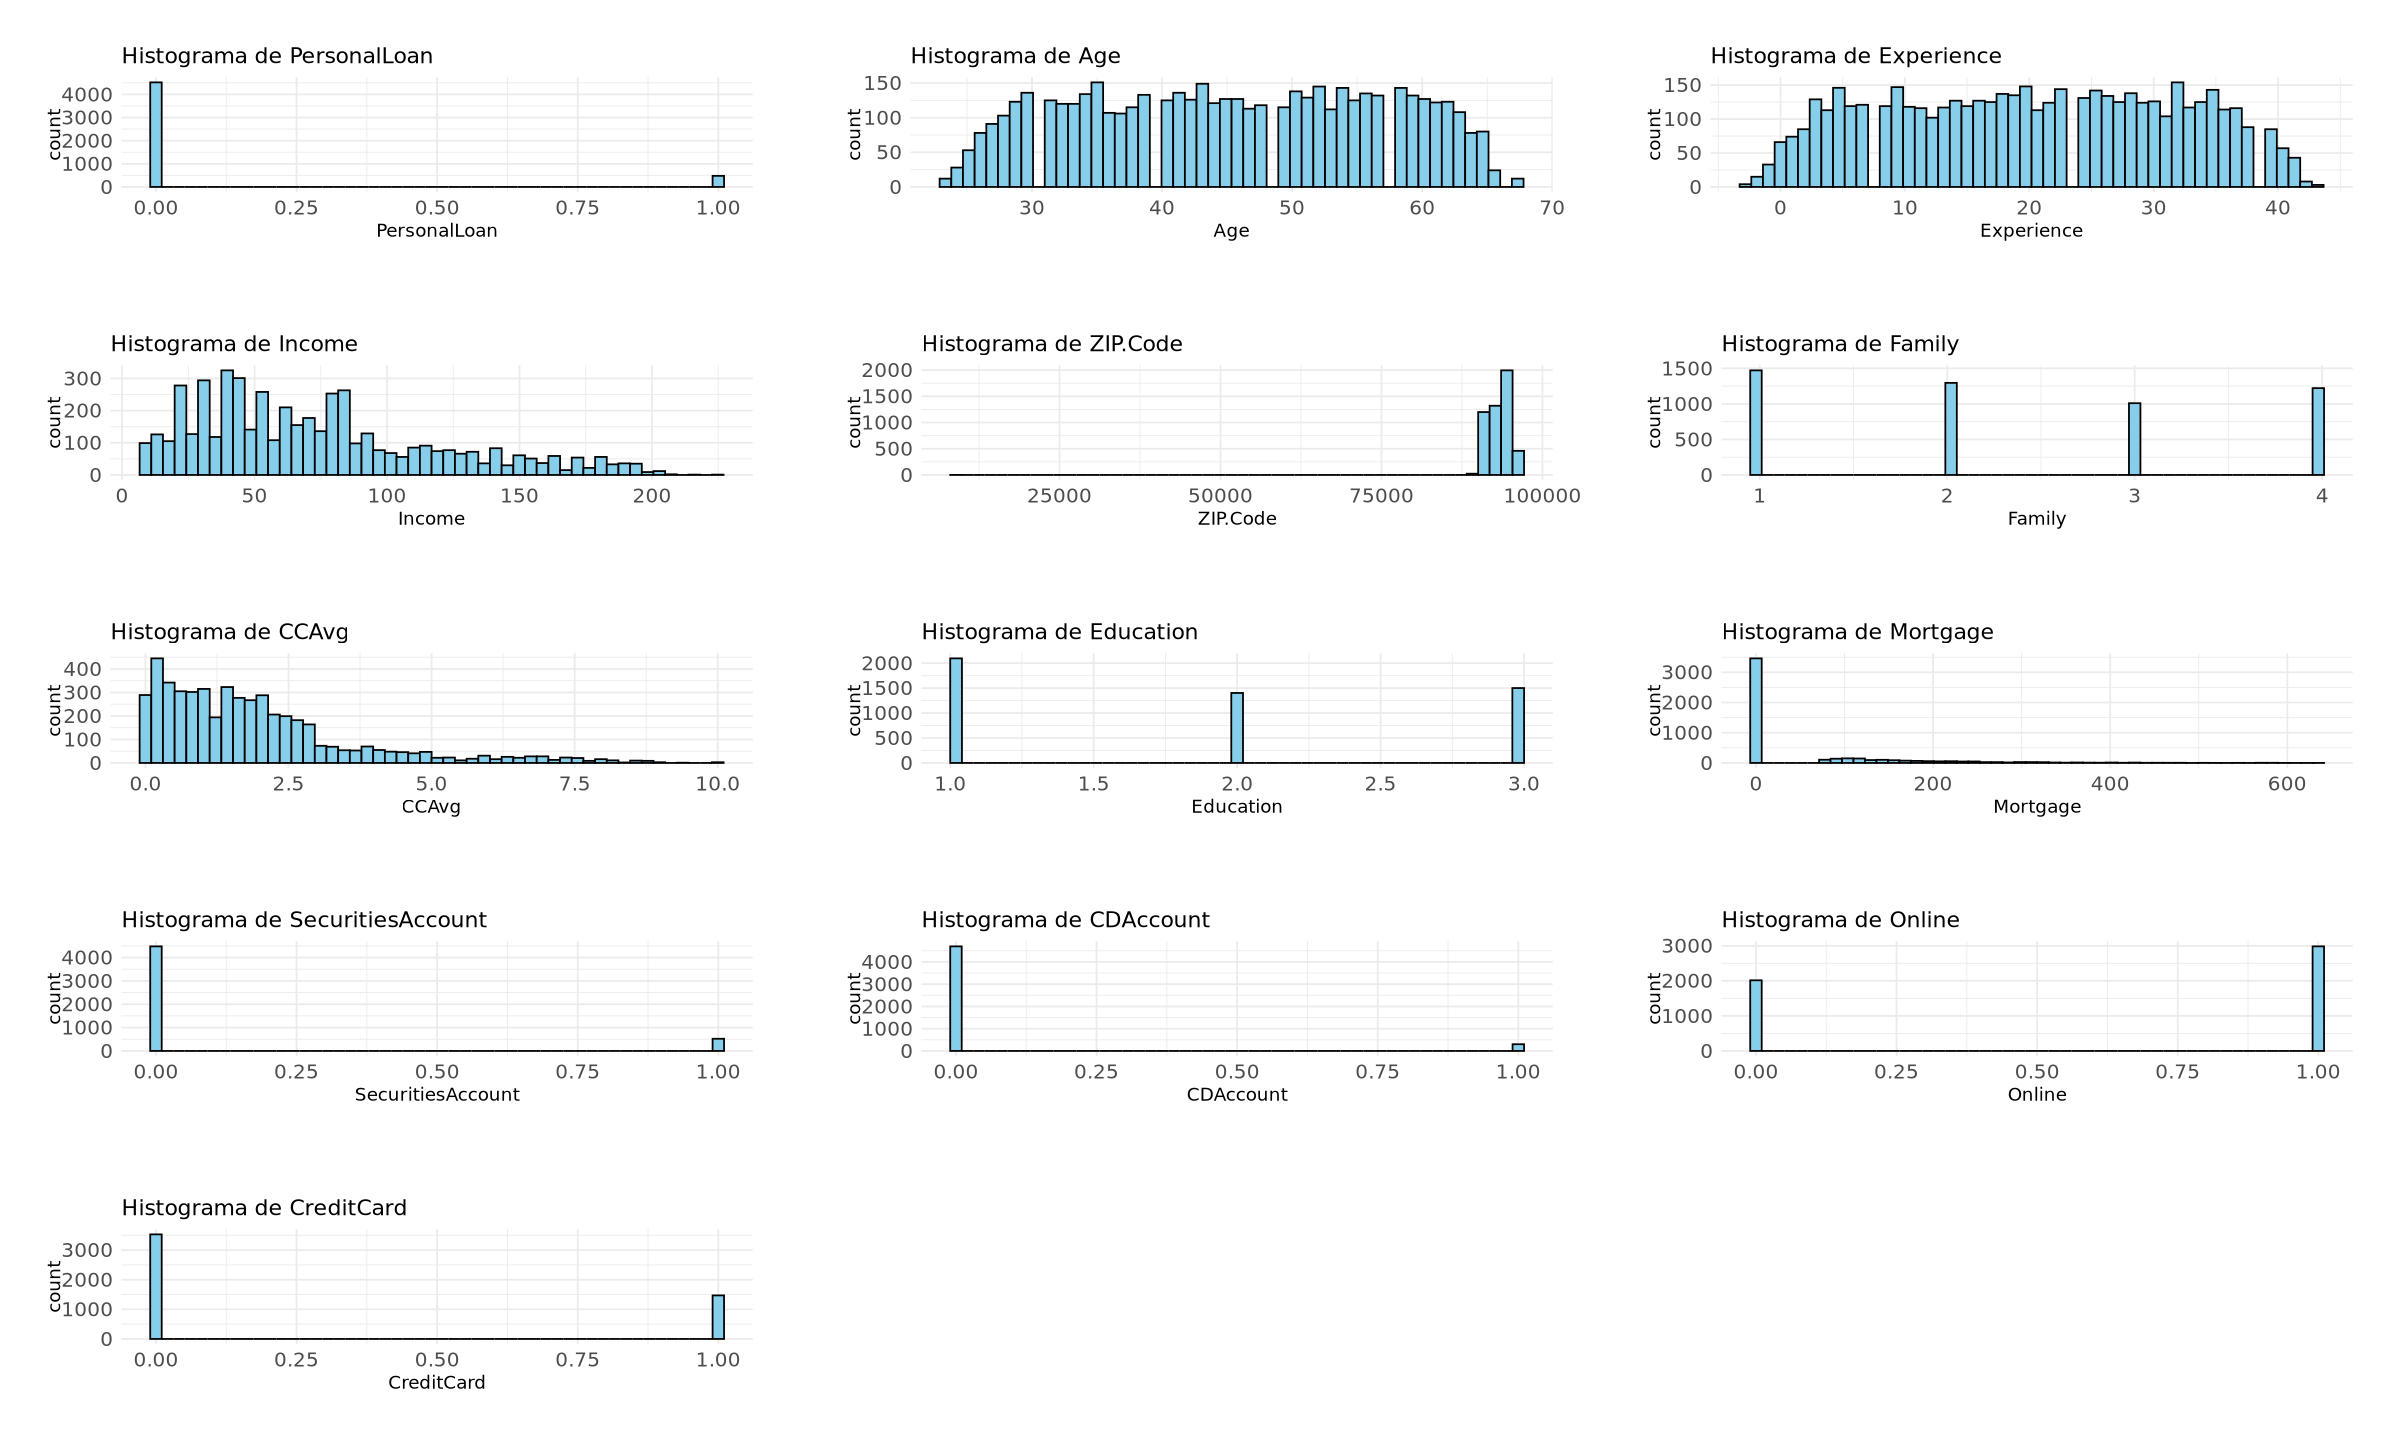

In [ ]:
# Seleciona colunas numéricas
num_cols <- sapply(dataset, is.numeric)  
dataset_numeric <- dataset[, num_cols]  
dataset_numeric <- dataset_numeric |> dplyr::select(-ID)

# Cria uma lista de histogramas
histograms <- lapply(names(dataset_numeric), function(col) {
  ggplot(dataset, aes_string(x = col)) + 
    geom_histogram(bins = 50, color = "black", fill = "skyblue") + 
    theme_minimal() +
    theme(
      axis.text.x = element_text(size = 12),  
      axis.text.y = element_text(size = 12),  
      plot.margin = margin(1, 1, 1, 1, "cm")  
    ) +
    ggtitle(paste("Histograma de", col))
})

options(repr.plot.width = 20, repr.plot.height = 12)
# Organiza os histogramas em um grid com 3 colunas
grid.arrange(grobs = histograms, ncol = 3)

In [19]:
print(dim(df))
print(anyNA(df))

[1] 5000   14


[1] FALSE


### 3.2. <a id='toc3_2_'></a>[Data Visualisation](#toc0_)

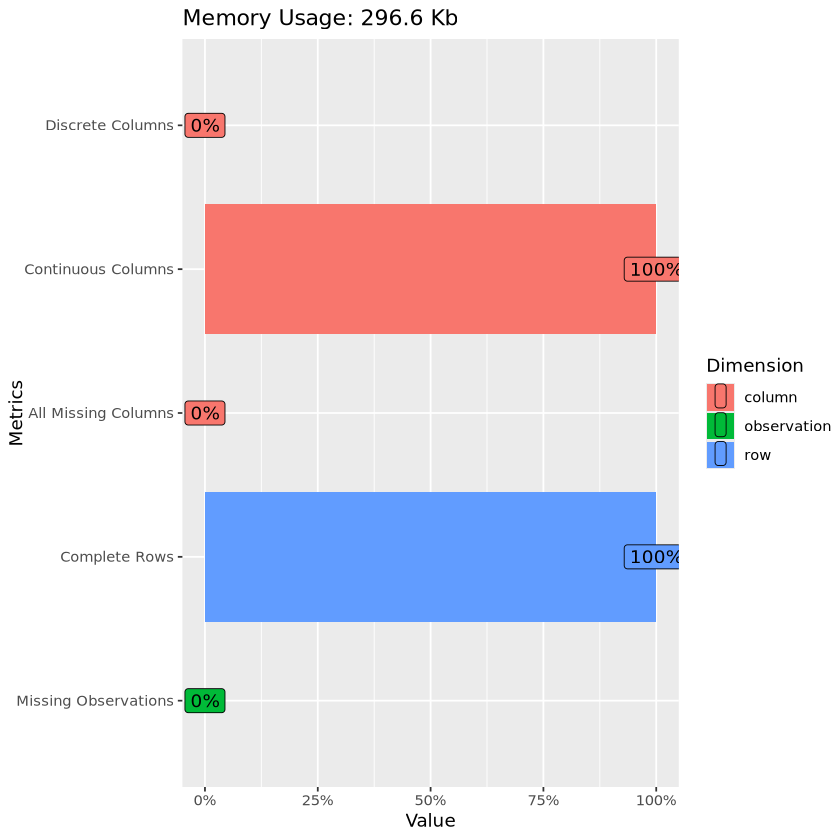

In [8]:
DataExplorer::plot_intro(dataset)

### 3.3. <a id='toc3_3_'></a>[Time Series Analysis](#toc0_)

## 4. <a id='toc4_'></a>[Data Preparation](#toc0_)

### 4.1. <a id='toc4_1_'></a>[Data Cleaning](#toc0_)

### 4.2. <a id='toc4_2_'></a>[Feature Selection](#toc0_)

## 5. <a id='toc5_'></a>[Evaluate Algorithms and Models](#toc0_)

### 5.1. <a id='toc5_1_'></a>[Train/Test Split](#toc0_)

### 5.2. <a id='toc5_2_'></a>[Test Options and Evaluation Metrics](#toc0_)

### 5.3. <a id='toc5_3_'></a>[Compare Models and Algorithms](#toc0_)

#### 5.3.1. <a id='toc5_3_1_'></a>[Machine Learning models-scikit-learn](#toc0_)

Regression and Tree Regression Algorithms

Neural Network Algorithms


Ensable Models

#### 5.3.2. <a id='toc5_3_2_'></a>[Time Series based Models-ARIMA and LSTM](#toc0_)

## 6. <a id='toc6_'></a>[Model Tuning and Grid Search](#toc0_)

## 7. <a id='toc7_'></a>[Finalise the model](#toc0_)

### 7.1. <a id='toc7_1_'></a>[Result on the test dataset](#toc0_)

### 7.2. <a id='toc7_2_'></a>[Save Model for Later Use](#toc0_)